<a href="https://colab.research.google.com/github/Sou-786/Deep-Learning-Car-Brand-Classification/blob/main/Car_Brand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
car=('/content/drive/My Drive/Car_Datasets.zip')

In [ ]:
import zipfile

In [ ]:
zip_ref=zipfile.ZipFile(car)
zip_ref.extractall()

In [ ]:

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/Car_Datasets.zip (Unzipped Files)/Datasets/Train'
valid_path = '/content/drive/My Drive/Car_Datasets.zip (Unzipped Files)/Datasets/Test'

In [ ]:
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/Car_Datasets.zip (Unzipped Files)/Datasets/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
 #Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Car_Datasets.zip (Unzipped Files)/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Car_Datasets.zip (Unzipped Files)/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 62s 31s/step - loss: 5.6954 - accuracy: 0.2344 - val_loss: 17.2856 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 1s 575ms/step - loss: 11.4917 - accuracy: 0.3906 - val_loss: 9.7456 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 571ms/step - loss: 5.1503 - accuracy: 0.3906 - val_loss: 1.8407 - val_accuracy: 0.1552
Epoch 4/50
2/2 [==============================] - 1s 569ms/step - loss: 2.8732 - accuracy: 0.3750 - val_loss: 3.8644 - val_accuracy: 0.5172
Epoch 5/50
2/2 [==============================] - 1s 554ms/step - loss: 4.8116 - accuracy: 0.4219 - val_loss: 4.0996 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 1s 567ms/step - loss: 5.0467 - accuracy: 0.3906 - val_loss: 2.5675 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 1s 559ms/step - loss: 2.2148 - ac

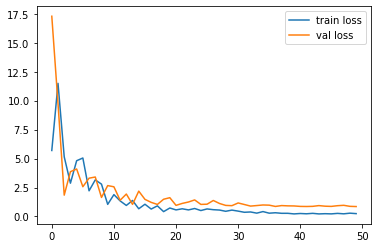

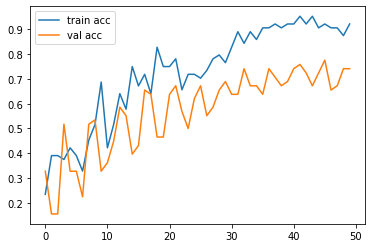

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')



In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 2. Save Keras Model or weights on google drive

# create on Colab directory
model.save('model_resnet50.h5')    
model_file = drive.CreateFile({'Carpred' : 'model_resnet50.h5'})
model_file.SetContentFile('model_resnet50.h5')
model_file.Upload()

# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '16Q2ILWzAw21YRwa0vkWrm3VEYxaZAtVc'})

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[1.4936699e-01, 2.3697069e-02, 8.2693589e-01],
       [1.9818680e-02, 9.5205778e-01, 2.8123483e-02],
       [8.8910805e-03, 9.9064237e-01, 4.6654552e-04],
       [7.2940834e-06, 1.4084569e-03, 9.9858427e-01],
       [5.1226094e-02, 9.3135422e-01, 1.7419612e-02],
       [9.5661275e-02, 1.0250613e-01, 8.0183256e-01],
       [6.3756993e-03, 3.7830743e-01, 6.1531687e-01],
       [2.5090074e-02, 8.8803458e-01, 8.6875424e-02],
       [2.3431748e-01, 4.3348512e-01, 3.3219743e-01],
       [2.1787301e-02, 9.2884928e-01, 4.9363449e-02],
       [6.2621138e-03, 6.0123235e-01, 3.9250559e-01],
       [6.2072687e-03, 9.6205240e-01, 3.1740416e-02],
       [1.8486686e-02, 8.9557010e-01, 8.5943244e-02],
       [5.6644902e-02, 4.3032783e-01, 5.1302731e-01],
       [1.2304954e-02, 9.3512523e-01, 5.2569900e-02],
       [6.2908772e-03, 9.7381419e-01, 1.9894863e-02],
       [2.8228205e-02, 5.9723526e-01, 3.7453654e-01],
       [1.6503051e-03, 9.8770696e-01, 1.0642701e-02],
       [1.6112599e-01, 6.501

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
img=image.load_img('/content/29.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 64.,  64.,  72.],
        [ 36.,  36.,  44.],
        [ 39.,  39.,  47.],
        ...,
        [200., 206., 220.],
        [200., 206., 220.],
        [200., 206., 220.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       ...,

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[170., 173., 178.],
        [168., 171., 176.],
        [166., 1

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape


(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.7780687 , 0.17084536, 0.0510859 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([0])